# Linear Classification

- Linear classification is a simple and effective method for classifying data into two or more classes.
- It is based on the idea of finding a linear decision boundary that separates the data into different classes.
- It thresholds the output of a linear function to classify the data : 
$$ y = w^T x + b > 0 $$
- If $y > 0$, then the data point is classified as class 1, otherwise it is classified as class 0.

Linear classifier separates two classes using decision boundary, a line, a plane, or a hyperplane.



## Logistic Regression

- Logistic regression is a linear classification algorithm that uses the logistic function to model the probability of a data point belonging to a particular class.
- The logistic function is defined as :
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
- The output of the logistic function is in the range [0, 1], which can be interpreted as the probability of the data point belonging to class 1.
- The decision boundary is defined as :
$$ \sigma(w^T x + b) > 0.5 $$
- If $\sigma(w^T x + b) > 0.5$, then the data point is classified as class 1, otherwise it is classified as class 0.


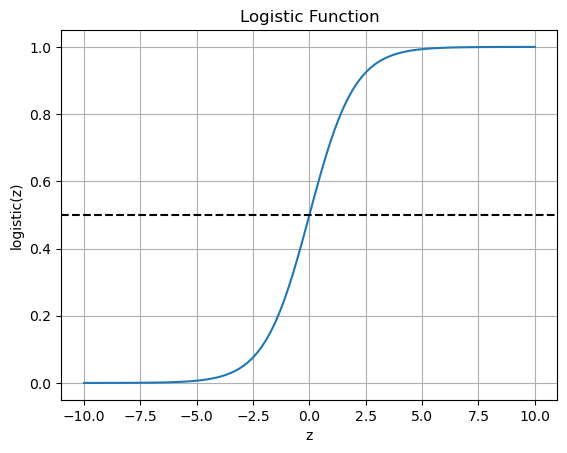

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
y = logistic_function(z)

plt.plot(z, y)
plt.axhline(0.5, color='black', linestyle='--')
plt.xlabel('z')
plt.ylabel('logistic(z)')
plt.title('Logistic Function')
plt.grid(True)
plt.show()



## Linear SVM

- Linear SVM is a linear classification algorithm that uses the hinge loss function to model the margin between the decision boundary and the data points.
- The hinge loss function is defined as :
$$ L(y, \hat{y}) = max(0, 1 - y \hat{y}) $$
- The output of the hinge loss function is in the range [0, inf], which can be interpreted as the margin between the decision boundary and the data points.
- The decision boundary is defined as :
$$ w^T x + b > 0 $$
- If $w^T x + b > 0$, then the data point is classified as class 1, otherwise it is classified as class 0.



In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


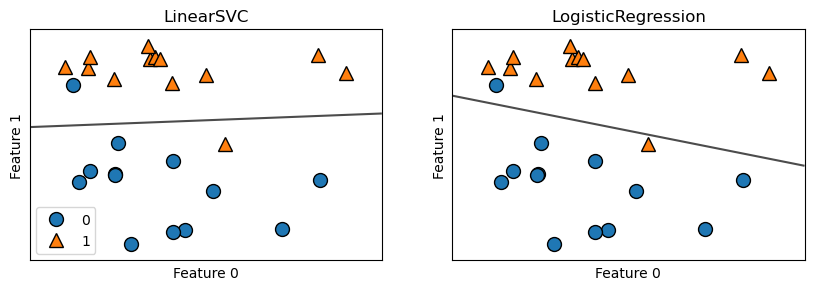

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y  = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

- For LogisticRegression and LinearSVC the parameter C is used to control the trade-off between the margin and the classification error.
- The parameter C is the inverse of regularization strength, smaller values specify stronger regularization.

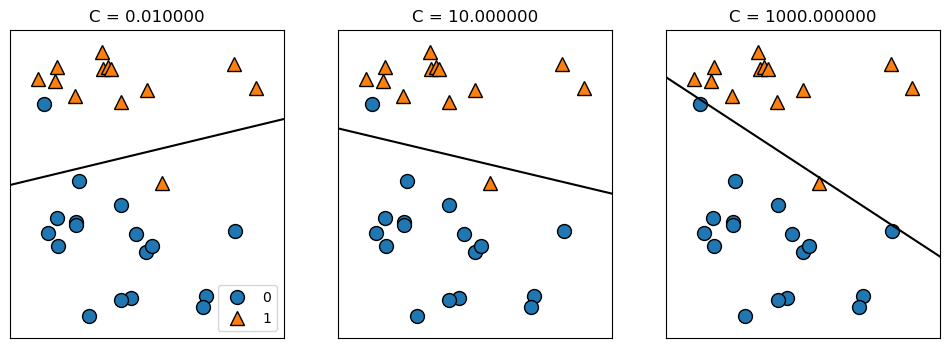

In [30]:
mglearn.plots.plot_linear_svc_regularization()

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


In [32]:
logreg100 = LogisticRegression(C=100, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.965


In [33]:
logreg001 = LogisticRegression(C=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


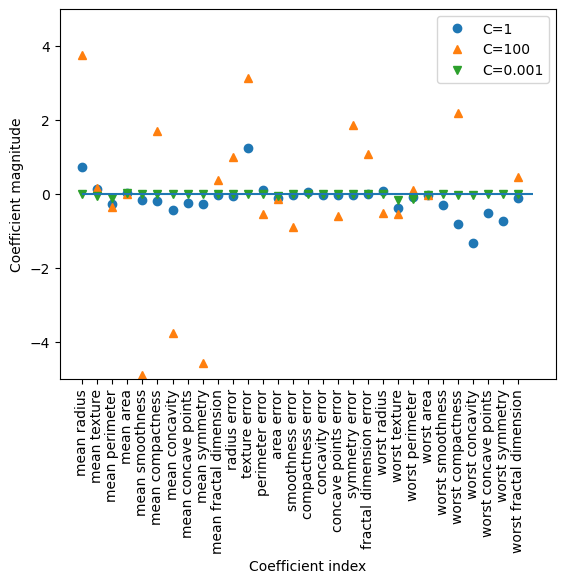

In [34]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


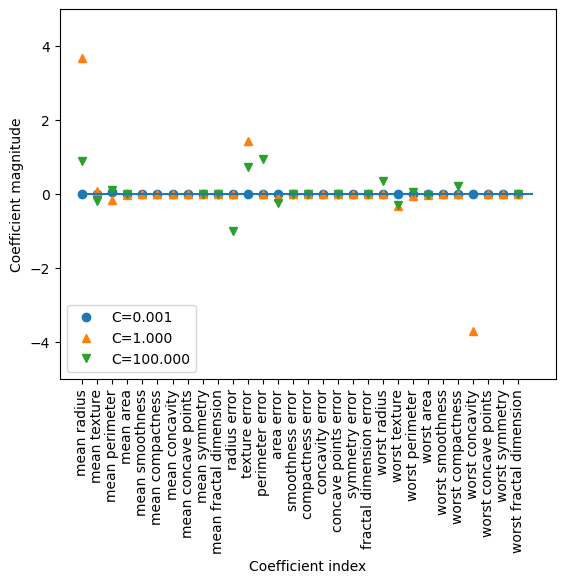

In [35]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear', max_iter=100000).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

## Linear Models for Multi-class Classification

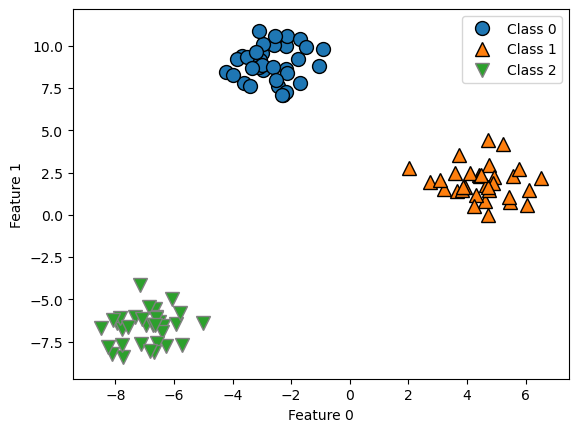

In [36]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

### One vs Rest

One vs Rest (OvR) is a simple and effective method for extending binary classification algorithms to multi-class classification problems.

- For each class, a binary classifier is trained to distinguish between that class and all other classes.
- The class with the highest score from the binary classifiers is predicted as the output.


In [37]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


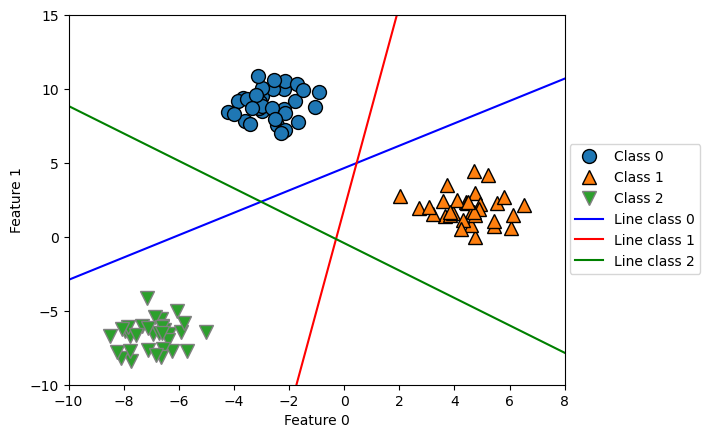

In [38]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

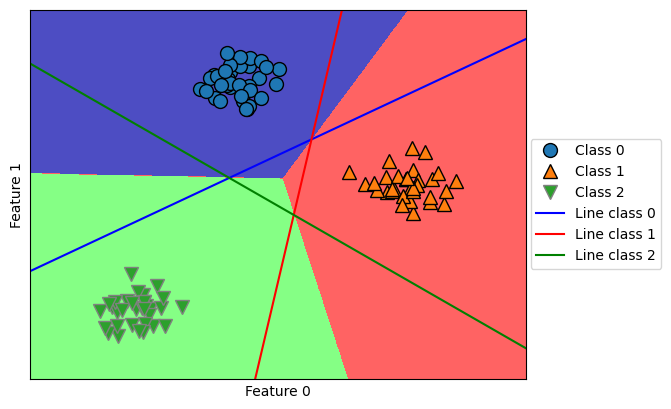

In [39]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- Test data falls into a region where two or more classifiers predict different classes,
    the class with the highest score is predicted as the output.

## Advantages and Disadvantages

### Advantages

- Simple and easy to implement.
- Fast training and prediction times.
- Interpretable and can provide insights into the data.

### Disadvantages

- In lower dimensional spaces, other models might yield better generalization performance.
- Linear models are not able to capture complex relationships in the data.
- Sensitive to outliers and noise in the data.